In [3]:
import pandas as pd

In [4]:
titanic = pd.read_csv("train.csv")

In [5]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic[titanic['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [12]:
titanic.loc[titanic['Embarked'].isnull(), 'Embarked'] = 'S'

In [13]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

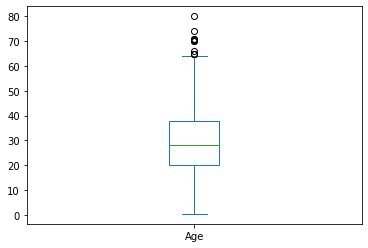

In [14]:
titanic['Age'].plot.box()

<AxesSubplot:ylabel='Frequency'>

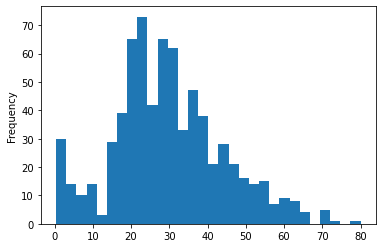

In [15]:
titanic['Age'].plot.hist(bins=30)

In [16]:
titanic.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [17]:
titanic.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [18]:
titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median')

0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: Age, Length: 891, dtype: float64

In [19]:
titanic['Age_Check1'] = titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median')

In [20]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_Check1  
0      0         A/5 21171   7.2500   NaN        S        25.0  
1      0          PC 17599  71.2833   C85        C        35.0  
2      0  STON/O2. 3101282   7.9250   NaN        S        21.5  
3      0            113803  53.1000  C123        S        35.0  
4      0            373450   8.0500   NaN        S        25.0

In [21]:
titanic['Age_Check2'] = titanic['Age'].fillna(titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [22]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_Check1  Age_Check2  
0      0         A/5 21171   7.2500   NaN        S        25.0        22.0  
1      0          PC 17599  71.2833   C85        C        35.0        38.0  
2      0  STON/O2. 3101282   7.9250   NaN        S        21.5        26.0  
3      0            113803  53.1000  C123        S        35.0        35.0  
4      0            373450   8.0500   NaN        S        25.0        35.0

In [23]:
titanic[titanic['Age'].isnull()].head()

PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked  Age_Check1  Age_Check2  
5       0      0  330877   8.4583   NaN        Q        25.0        25.0  
17      0      0  244373  13.0000   NaN        S        30.0        30.0  
19      0      0    2649   7.2250   NaN        C        21.5        21.5  
26      0      0    2631   7.2250   NaN        C        25.0        25.0  
28      0      0  330959   7.8792   NaN        Q        21.5        21.5

In [24]:
titanic['Age'] = titanic['Age'].fillna(titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [25]:
titanic = titanic.drop(['Age_Check1', 'Age_Check2'], axis=1)

In [26]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
titanic.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [28]:
titanic = titanic.drop('Cabin', axis=1)

In [29]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [30]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

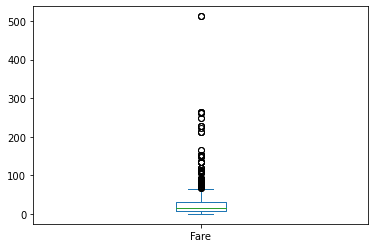

In [31]:
titanic['Fare'].plot.box()

In [32]:
titanic[titanic['Fare'] == titanic['Fare'].max()]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare Embarked  
258  female  35.0      0      0  PC 17755  512.3292        C  
679    male  36.0      0      1  PC 17755  512.3292        C  
737    male  35.0      0      0  PC 17755  512.3292        C

In [33]:
import matplotlib.pyplot as plt

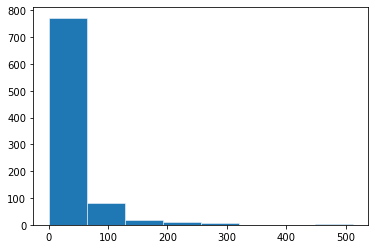

In [35]:
fig, ax = plt.subplots()

ax.hist(titanic['Fare'], bins=8, linewidth=.5, edgecolor="white")

plt.show()

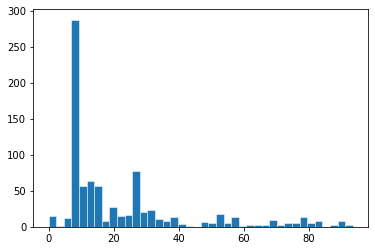

In [38]:
fig, ax = plt.subplots()

ax.hist(titanic[titanic['Fare'] < 100]['Fare'], bins=40, linewidth=.5, edgecolor="white")

plt.show()

In [39]:
import seaborn as sns

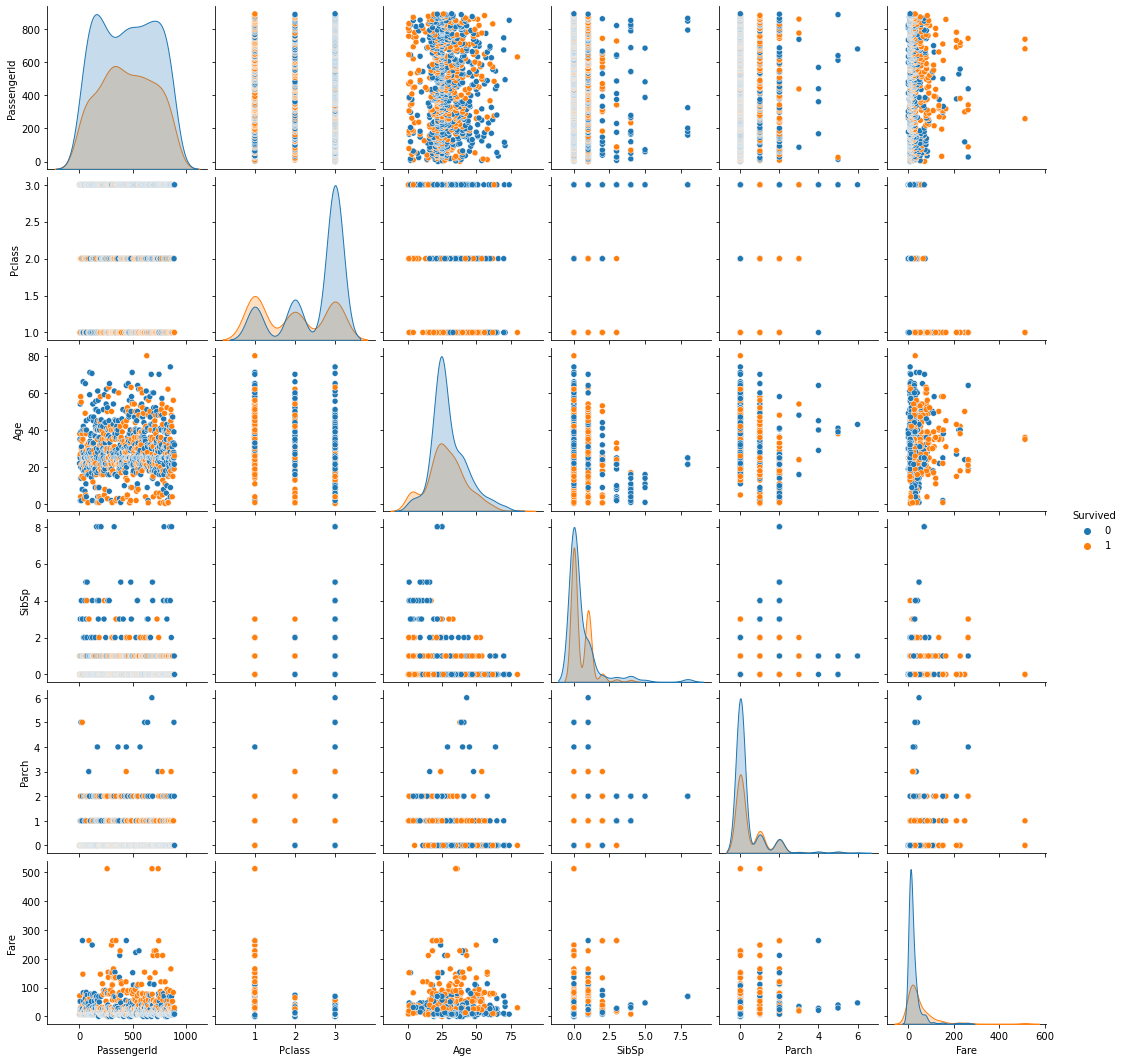

In [41]:
sns.pairplot(titanic, hue="Survived")

In [42]:
titanic.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.039033 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.059579 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.413583  0.083081  0.018443   
Age             0.039033 -0.059579 -0.413583  1.000000 -0.249854 -0.175526   
SibSp          -0.057527 -0.035322  0.083081 -0.249854  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.175526  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.122692  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.122692  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

<AxesSubplot:>

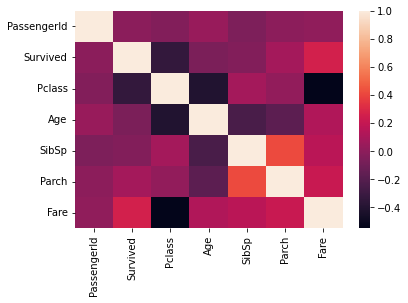

In [44]:
sns.heatmap(titanic.corr())

In [ ]:
titanic.head()

In [ ]:
titanic.nunique()

In [ ]:
titanic = titanic.drop('PassengerId', axis=1)

In [ ]:
titanic.head()

In [ ]:
titanic.info()

## Pandas Profiling

In [45]:
# !pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=4d97741da3d4c8285868e802963ae5805cab017d1d9e6ecf71613277b8d5675e
  Stored in directory: c:\users\brubi\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [47]:
# import pandas as pd
from pandas_profiling import ProfileReport

In [48]:
profile = ProfileReport(titanic, title="Pandas Profiling Report")

In [49]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
profile.to_file('relatorio.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]